# PyTorch Computer Vision

## Computer Vision Libraries

* `torchvision` base library for computer vision in PyTorch
* `torchvision.datasets` - get datasets and data loading functions for computer vision problems
* `torchvision.models` - get pre trained computer vision models
* `torchvision.tranforms` - functions for manipulatiing your vision data to be suitable for use in an ML model
* `torch.utils.data.Dataset` - base dataset class for pytorch
* `torch.utils.data.DataLoader` - create a python iterable over a dataset

In [1]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


## Getting a Dataset

Fashion MNIST - a take on the original MNIST dataset

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# get the test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 113MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 4.06MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 62.0MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# check shape of
print(f'Image Shape: {image.shape} -> (channel, height, width)')
print(f'Image Label: {class_names[label]}')

Image Shape: torch.Size([1, 28, 28]) -> (channel, height, width)
Image Label: Ankle boot


## Visualizing out Data

Image shape: torch.Size([1, 28, 28])


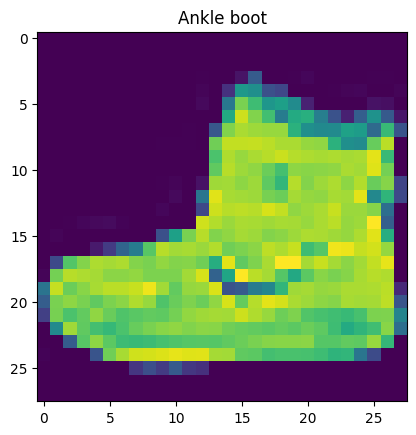

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(class_names[label]);

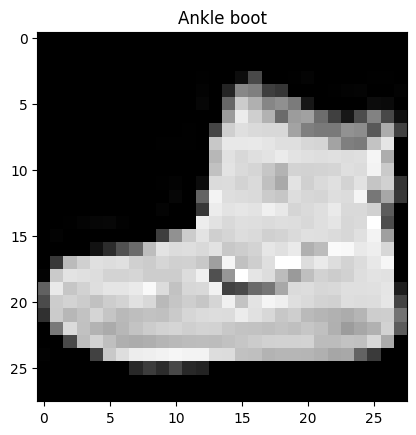

In [9]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

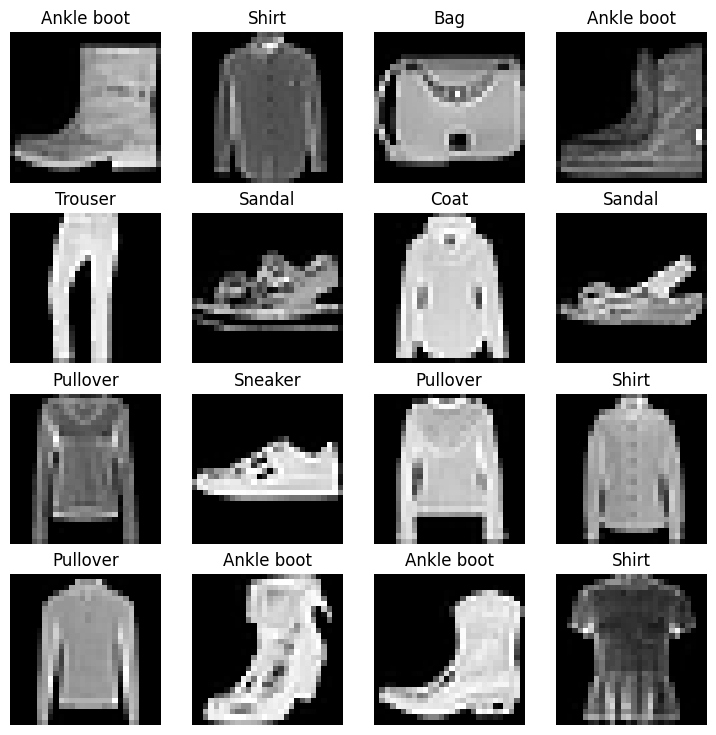

In [10]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False);

## Prepare DataLoader

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [12]:
# Turn Train and test datasets into iterables
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x786c2c78c910>,
 <torch.utils.data.dataloader.DataLoader at 0x786c2c9f9a50>)

In [13]:
# check out what we've created
print(f'DataLoader: {train_dataloader, test_dataloader}')
print(f'Length of Train Dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of Test Dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x786c2c78c910>, <torch.utils.data.dataloader.DataLoader object at 0x786c2c9f9a50>)
Length of Train Dataloader: 1875 batches of 32...
Length of Test Dataloader: 313 batches of 32...


## Check out What's inside a DataLoader

In [14]:
# see what's inside a dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


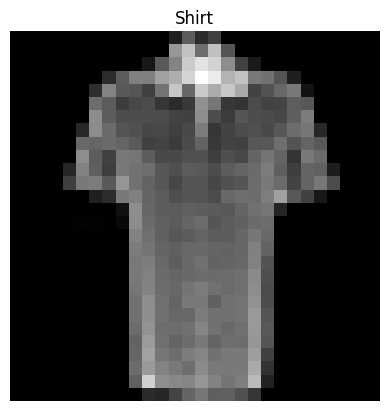

In [15]:
# SHow a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap= 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image Size: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

## Model 0 - Baseline

When starting to build ML models, it's best practice to start with a baseline model

A baseline model is a simple model that you try to improve

Start simply and add complexity when necessary

In [16]:
# create a flatten() layer
flatten_model = nn.Flatten()

# get a simgle sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform forward pass

# print what happened
print(f'Shape before flattening: {x.shape}')
print(f'Shape after flatteneing: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flatteneing: torch.Size([1, 784])


In [17]:
# Build a model
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to('cpu')
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Setup Loss and Optimizer Function

In [20]:
import requests
from pathlib import Path

# download helper functions
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists,skipping downnload')
else:
  print('downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

downloading helper_functions.py


In [21]:
# import accuracy metric from helper functions
from helper_functions import accuracy_fn

In [22]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### Create function to time experiments

ML is very experimental

Two things you will often want to track are:
1. model performance (loss, accuracy)
2. how fast it runs


In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  '''
  Prints diference between start and end time
  '''
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} secs')
  return total_time


In [24]:
start_time = timer()
# some code here
end_time = timer()
print_train_time(start_time, end_time, device='cpu')

Train time on cpu: 0.000 secs


2.623999998263571e-05

### Create a training loop and training on batches of data

1. Loop through epochs
2. loop through training batches, perform training steps, calculate train loss per batch
3. loop through testing batches, perform testing steps, calculate test loss per batch
4. print out what's happening
5. time it all

In [ ]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set epcohs
epochs = 3

# create trainin and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-----')
  ### Training
  train_loss = 0
  # add loop to go through each training batch
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # forward pass
    y_pred = model_0(X)

    # calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # optimizer zer grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # ptimizer step
    optimizer.step()

    # Print what's happening
    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples')

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate loss accumulatively
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true = y_test,
                              y_pred = test_pred.argmax(dim=1))

    # calculate test loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # print what's happening
  print(f'\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}')

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples


### Make Predictions and Get model 0 Results

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  '''returns a dictionary containing results of model predictions on data_loader'''
  loss, acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X,y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate loss and accurcy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y,
                         y_pred = y_pred.argmax(dim =1))

    # scale loss and acc
    loss /= len(dataloader)
    acc /= len(dataloader)

  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc}


In [ ]:
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

## Setup Device Agnostic Code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

## Model 1 - Building a better Model

In [ ]:
# create model with linear and nonlinear layers
# Build a model
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# setup model with input parameters
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_1

In [ ]:
next(model_1.parameters()).device

In [ ]:
# setup loss function and optimizer

# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

### Functionizing Training and Evaluation/testing loops

Let's create a function for
1. training loop - train_step()
2. testing loop - test_step()

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  '''
  performs training step for model trying to learn with data_loader
  '''

  train_loss, train_acc = 0,0
  model.to(device)
  # put model into training mode
  model.train()

  # add loop to go through each training batch
  for batch, (X,y) in enumerate(data_loader):

    # put data on the target device
    X,y = X.to(device), y.to(device)

    # forward pass
    y_pred = model(X)

    # calculate loss and accuracy per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred= y_pred.argmax(dim = 1))

    # optimizer zer grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # ptimizer step
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss:.5f} | Tarin Acc: {train_acc:.2f}%')

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  '''
  Evaluate the model
  '''
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # forward pass
      X,y = X.to(device), y.to(device)

      test_pred = model(X)

      # calculate loss accumulatively
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))

    # calculate test loss per batch
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    # print what's happening
    print(f'Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%\n')
    # print(X.device, y.device)
    # print(next(model.parameters()).device)

In [ ]:
torch.manual_seed(42)

# measure time
train_time_start_on_gpu = timer()

# epochs
epochs = 3

# create an optimization loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n--------')

  train_step(model = model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             )

  test_step(model= model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

In [ ]:
# get model 1 results
model_1_results = eval_model(model=model_1,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

## Model 2 - Build a Convolutional Network

Known for being able to learn patterns in image data

In [ ]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  '''
  model architecture that replicates the tinyVGG
  '''
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7* 7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f'Output shape of conv block 1: {x.shape}')
    x = self.conv_block_2(x)
    # print(f'Output shape of conv block 2: {x.shape}')
    x = self.classifier(x)
    # print(f'Output shape of clasifier block: {x.shape}')
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device=device)

In [ ]:
plt.imshow(image.squeeze(), cmap = 'gray')

In [ ]:
image.shape

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28,28))
rand_image_tensor.shape

In [ ]:
# pass image thrugh model
model_2(rand_image_tensor.unsqueeze(0).to(device))

### Stepping through the nn.Conv2d layer

In [ ]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size = (32,3, 64,64))
test_image = images[0]

print(f'image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'test Image:\n {test_image}')

In [ ]:
test_image.shape

In [ ]:
torch.manual_seed(42)

# crate a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# pass data through conv layer
conv_ouput = conv_layer(test_image)
conv_ouput.shape

### Stepping through the nn.Maxpool layer

In [ ]:
test_image.shape

In [ ]:
# print the original image shape
print(f'Test Image shape: {test_image.shape}')

# create a single maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass through the conv layer
test_image_thru_conv = conv_layer(test_image)
print(f'Shape after going through conv layer: {test_image_thru_conv.shape}')

# pass through maxpool layer
test_image_thru_conv_and_maxpool = max_pool_layer(test_image_thru_conv)
print(f'Shape after going through conv and max pool: {test_image_thru_conv_and_maxpool.shape}')

In [ ]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size =(1 ,1, 2,2))
print(f'\nRandoml Tensor:\n {random_tensor}')
print(f'Random tensor shape: {random_tensor.shape}')


# create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f'\nMax Pool Tensor:\n {max_pool_tensor}')
print(f'Max pool tensor shape: {max_pool_tensor.shape}')

### Setup Loss function and Optimizer

In [ ]:
# setup loss function, optimizer and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Training and Testing model 2

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure the time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

In [ ]:
# model 2 resuts
model_2_results = eval_model(model=model_2,
                             dataloader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             )
model_2_results

In [ ]:
model_0_results

## Compare model Results and Training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

In [ ]:
# add training time to results comparison
compare_results['Training Time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

In [ ]:
# visualize our mode results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy %')
plt.ylabel('model');

## Make and Evaluate Predictions with the best Model


In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # forward pass
      pred_logits = model(sample)

      # get prediction probability
      pred_prob = torch.softmax(pred_logits.squeeze(), dim =0)

      # get pred_probs off gpu
      pred_probs.append(pred_prob.cpu())

  # stack the predprobs to turn list to tensor
  return torch.stack(pred_probs)




In [ ]:
import random
# random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

In [ ]:
plt.imshow(test_samples[0].squeeze(0), cmap='gray')
plt.title(class_names[test_labels[0]]);

In [ ]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# get the first 2 prediction probabiliies
pred_probs[:2]

In [ ]:
# convert prediction probabilitites to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

In [ ]:
# plot predictions
plt.figure(figsize =( 9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows, ncols, i + 1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap = 'gray')

  # find the prediction label
  pred_label = class_names[pred_classes[i]]

  # get the truth label
  truth_label = class_names[test_labels[i]]

  # Create. a title
  title_text = f'Pred: {pred_label} | Truth {truth_label}'

  # change color of text depending on equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 14, c = 'g')
  else:
    plt.title(title_text, fontsize = 14, c = 'r')

  plt.axis(False);

## Making a Confusion Matrix

1. We need to mak predictions with our model on the test set
2. make a confusion matrix using torch-metrics
3. Plot the confusion matrix using ML extended

In [ ]:
# import tqdm.auto
from tqdm.auto import tqdm

# 1 make predictions
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    # do forward pass
    y_logit = model_2(X)
    # logits -> probabilities -> labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim = 1)
    # put predictins on cpu
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

In [ ]:
import mlxtend
mlxtend.__version__

In [ ]:
# See if required packages are installed if not, install them
try:
  import torchmettics
except:
  !pip install -q torchmetrics

In [ ]:
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predicitons to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## Save an Load Best Performing Model

In [ ]:
from pathlib import Path

# create model dicrectory path
MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create mode save path
MODEL_NAME = '03_pytorch_computervison_model_2.pth'
MODEL_Save_PATH = MODEL_PATH / MODEL_NAME

# save the model state dict
print(f'Saving Model to: {MODEL_Save_PATH}')
torch.save(obj=model_2.state_dict(),
           f = MODEL_Save_PATH)

In [ ]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                      hidden_units=10,
                                     output_shape=len(class_names)
                                     )

loaded_model_2.load_state_dict(torch.load(f=MODEL_Save_PATH))

# send to target device
loaded_model_2.to(device)


In [ ]:
model_2_results

In [ ]:
# evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results